In [1]:
from fastai import *
from fastai.vision import *
import seaborn as sns

In [2]:
path = Path('../input/aptos2019-blindness-detection/')

In [3]:
path.ls()

[PosixPath('../input/aptos2019-blindness-detection/train.csv'),
 PosixPath('../input/aptos2019-blindness-detection/sample_submission.csv'),
 PosixPath('../input/aptos2019-blindness-detection/test.csv'),
 PosixPath('../input/aptos2019-blindness-detection/train_images'),
 PosixPath('../input/aptos2019-blindness-detection/test_images')]

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
df_test = pd.read_csv(path/'test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [6]:
print(len(df))
print(len(df_test))

3662
1928


In [7]:
print(df.isna().sum()) 
print('-' * 20)
print(df_test.isna().sum())

id_code      0
diagnosis    0
dtype: int64
--------------------
id_code    0
dtype: int64


In [8]:
df.diagnosis.value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [9]:
# use PIL and cv2 to see what you can do with images

In [10]:
# read more about domain knowledge

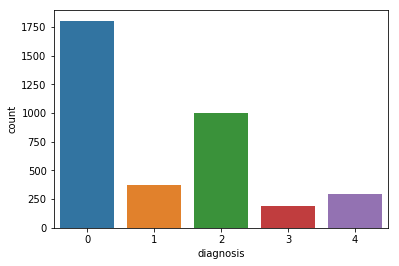

In [11]:
# plot the value counts as histogram
sns.countplot(df['diagnosis'])

In [12]:
# plot the various sizes of images

In [13]:
# plot the images from 0 and 4 to see the difference
df_0 = df[df['diagnosis'] == 0]
df_0.head()

,id_code,diagnosis
3,002c21358ce6,0
4,005b95c28852,0
6,0097f532ac9f,0
10,00cc2b75cddd,0
12,00f6c1be5a33,0


In [14]:
df_4 = df[df['diagnosis'] == 4]
df_4.head()

,id_code,diagnosis
1,001639a390f0,4
5,0083ee8054ee,4
32,0243404e8a00,4
34,02685f13cefd,4
38,02dda30d3acf,4


In [15]:
# in the next notebook work with various augmentations

In [16]:
data = (ImageList.from_df(df_0,path,folder='train_images',suffix='.png')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_df()
        .transform(get_transforms(),size=128)
        .databunch()).normalize(imagenet_stats)

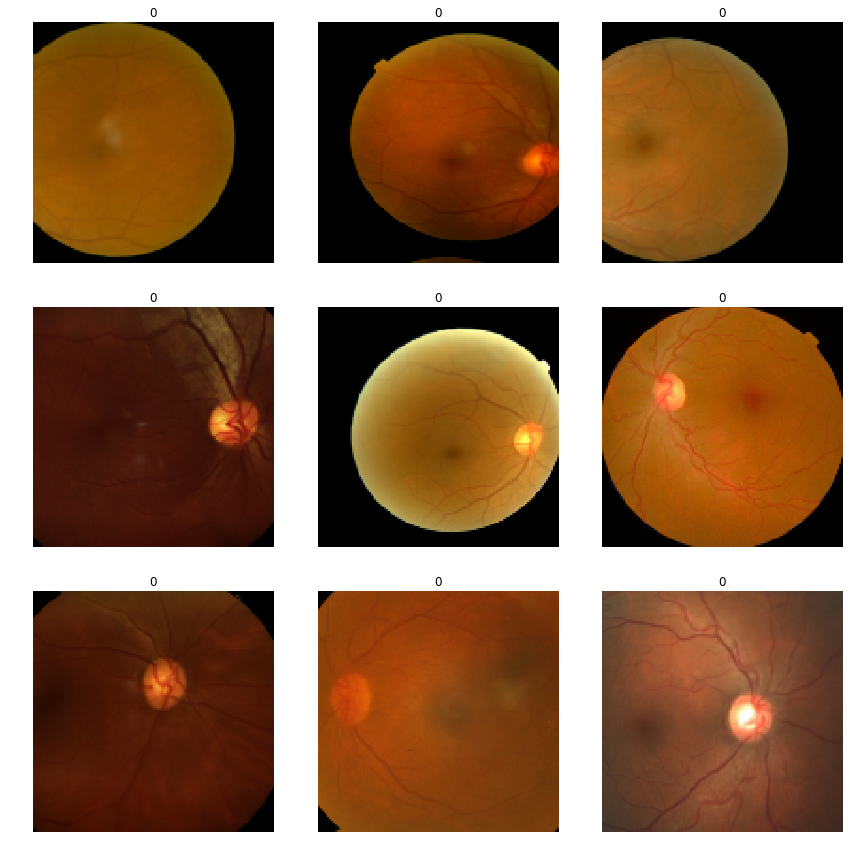

In [17]:
# add figsize argument
data.show_batch(rows=3)

In [18]:
data = (ImageList.from_df(df_4,path,folder='train_images',suffix='.png')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_df()
        .transform(get_transforms(),size=128)
        .databunch()).normalize(imagenet_stats)

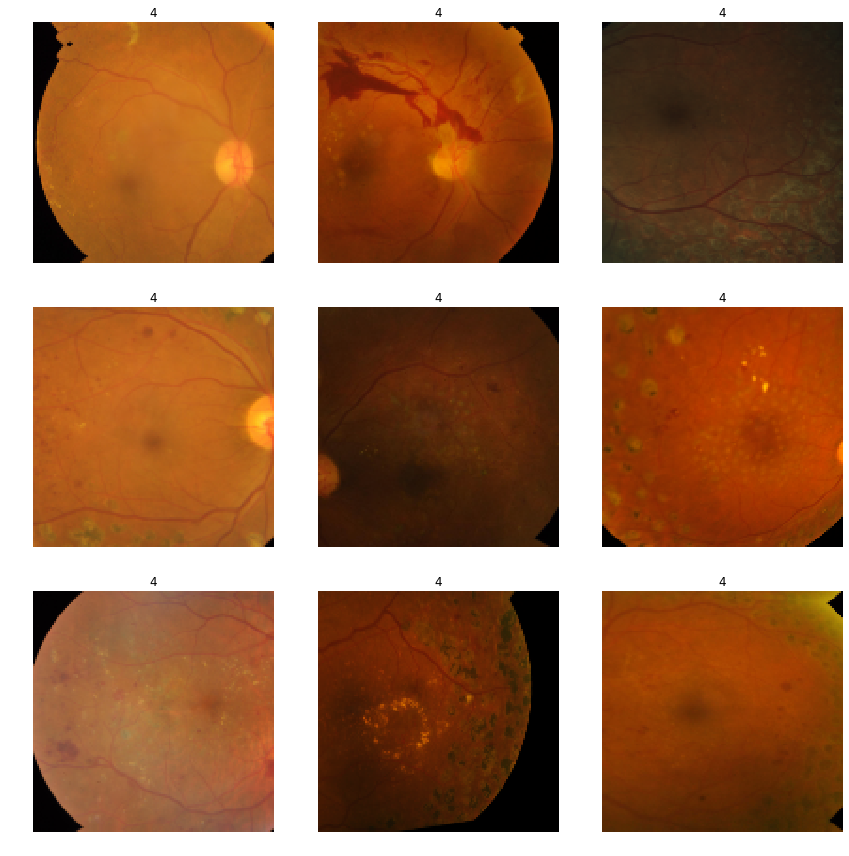

In [19]:
data.show_batch(rows=3)